In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
def split_telco(df):

    '''
    Takes in a dataframe and return train, validate, test subset dataframes.
    Takes a random seed and target variable for stratification purposes .
    The test dataset is 20% of the original data,
    The train and validate represents the remaining 80% which is further split into train and validate
    the train set is 70% of 80 %. Which is about 56% of the original data
    The validate set is is 30% of 80% Which is about 24% of the original data
    
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)
    
    # printing the shape of the dataframes
    print(f'Train : {train.shape}')
    print(f'Validate : {validate.shape}')
    print(f'Test: {test.shape}')
    
    return train, validate, test

In [3]:
def frequencies(train, cat_variables):
    '''
    This functions takes in a data framme and a list of categorical variables and returns the frequency
    and weel as the value and percentage of each
    
    '''
    lab = list(train[cat_variables].unique())
    
    table = (pd.DataFrame({cat_variables:lab,
                          'Count':train[cat_variables].value_counts(normalize=False),
                          'percentage':round(train[cat_variables].value_counts(normalize=True)*100,2)}))
    return table

In [4]:
def plot_univariate_cat(train, cat_variables):
    '''
    This function takes a dataframe and categorical variables and returns an frequency table and a bar plot.
    as well as the proportion of churn in relation to total churn.
    
    '''
    table_freq = frequencies(train,cat_variables)
    plt.figure(figsize=(2,2))
    sns.barplot(x= cat_variables, y='Count', data=table_freq, color='lightseagreen')
    plt.title(cat_variables)
    plt.show()
    print(table_freq)

In [5]:
def plot_univariate_quant(train, var_quant):
    '''
    This function takes a dataframe and Quantitative variables and returns a descrptive statistics,
    as well as histogram and boxplot  .
    
    '''
    stats_des = train[var_quant].describe()
    plt.figure(figsize=(8,2))
    
    #first subplot
    p = plt.subplot(1,2,1)
    p = plt.hist(train[var_quant], color='lightseagreen')
    p = plt.title(var_quant)
    
    #second subplot
    p = plt.subplot(1,2,2)
    p = plt.boxplot(train[var_quant])
    p = plt.title(var_quant)
    
    return p, stats_des
    

In [6]:
def univariate_explorer(train, cat_variables, var_quant):
    for x in cat_variables:
        plot_univariate_cat(train, x)
        print('=========================================================================')
    for x in var_quant:
        p, stats_des = plot_univariate_quant(train,x)
        plt.show(p)
        print(stats_des)
    

In [7]:
#test function to make sure it runs

In [8]:
import acquire as aqr
import prepare as prep

In [9]:
raw_data = aqr.get_telco_data()

In [10]:
raw_data.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [11]:
df = raw_data.copy()

In [12]:
df = prep.prep_telco()

In [13]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,Female,0,1,1,65,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,0,0,54,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,0,0,56,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,1,0,72,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [14]:
train, validate, test = split_telco(df)

Train : (3943, 33)
Validate : (1691, 33)
Test: (1409, 33)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        3943 non-null   object 
 1   gender             3943 non-null   object 
 2   senior_citizen     3943 non-null   int64  
 3   partner            3943 non-null   int64  
 4   dependents         3943 non-null   int64  
 5   tenure             3943 non-null   int64  
 6   phone_service      3943 non-null   int64  
 7   multiple_lines     3943 non-null   int64  
 8   online_security    3943 non-null   int64  
 9   online_backup      3943 non-null   int64  
 10  device_protection  3943 non-null   int64  
 11  tech_support       3943 non-null   int64  
 12  streaming_tv       3943 non-null   int64  
 13  streaming_movies   3943 non-null   int64  
 14  paperless_billing  3943 non-null   int64  
 15  monthly_charges    3943 non-null   float64
 16  total_charges      39

In [16]:
# testisng explore
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract', 'internet', 'payment_type',
       'female', 'male', 'monthly_contract', 'one_yr_contract',
       'two_yr_contract', 'dsl', 'fiber', 'no_internet', 'bank_transfer',
       'credit_card', 'electronic_check', 'mailed_check'],
      dtype='object')

In [22]:
data = train.drop(['customer_id'], axis=1)

special_col = ['tenure','monthly_charges','total_charges']

variables= data.columns.to_list()

# remove special_col from list

for col in special_col:
    if col in variables:
        variables.remove(col)
    


In [25]:
var_quant =['tenure','monthly_charges']
cat_variables =['senior_citizen', 'partner', 'dependents','gender','female','male','phone_service','multiple_lines','device_protection','online_security','online_backup','tech_support','streaming_tv','streaming_movies','dsl','fiber','no_internet','paperless_billing','bank_transfer','credit_card','electronic_check','mailed_check','monthly_contract','one_yr_contract','two_yr_contract']

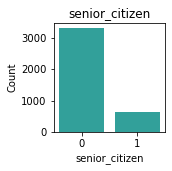

   senior_citizen  Count  percentage
0               0   3303       83.77
1               1    640       16.23


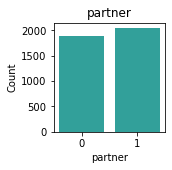

   partner  Count  percentage
0        1   2044       51.84
1        0   1899       48.16


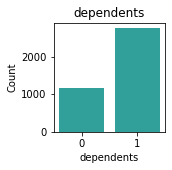

   dependents  Count  percentage
0           1   2764        70.1
1           0   1179        29.9


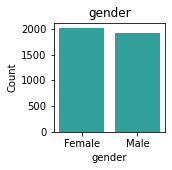

        gender  Count  percentage
Male    Female   2013       51.05
Female    Male   1930       48.95


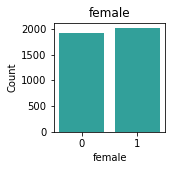

   female  Count  percentage
0       1   2013       51.05
1       0   1930       48.95


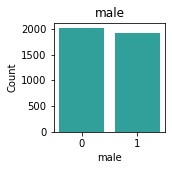

   male  Count  percentage
1     0   2013       51.05
0     1   1930       48.95


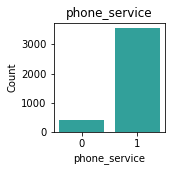

   phone_service  Count  percentage
1              1   3550       90.03
0              0    393        9.97


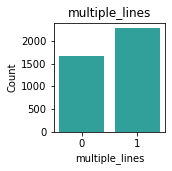

   multiple_lines  Count  percentage
0               1   2277       57.75
1               0   1666       42.25


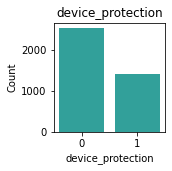

   device_protection  Count  percentage
0                  0   2534       64.27
1                  1   1409       35.73


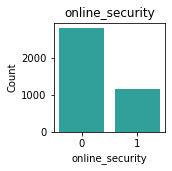

   online_security  Count  percentage
0                0   2794       70.86
1                1   1149       29.14


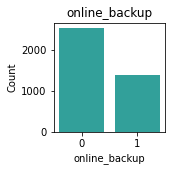

   online_backup  Count  percentage
0              0   2541       64.44
1              1   1402       35.56


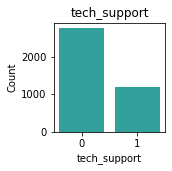

   tech_support  Count  percentage
0             0   2759       69.97
1             1   1184       30.03


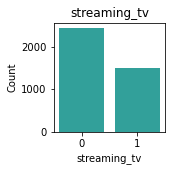

   streaming_tv  Count  percentage
0             0   2435       61.76
1             1   1508       38.24


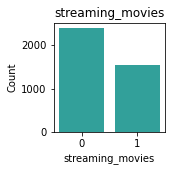

   streaming_movies  Count  percentage
0                 0   2389       60.59
1                 1   1554       39.41


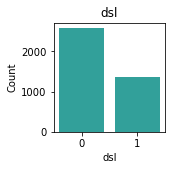

   dsl  Count  percentage
0    0   2578       65.38
1    1   1365       34.62


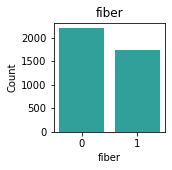

   fiber  Count  percentage
0      0   2203       55.87
1      1   1740       44.13


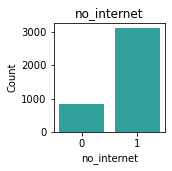

   no_internet  Count  percentage
0            1   3105       78.75
1            0    838       21.25


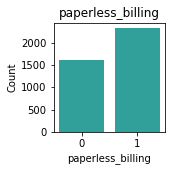

   paperless_billing  Count  percentage
1                  1   2324       58.94
0                  0   1619       41.06


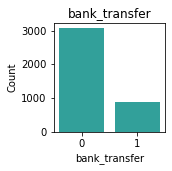

   bank_transfer  Count  percentage
0              0   3064       77.71
1              1    879       22.29


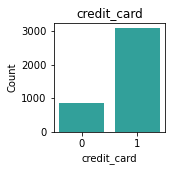

   credit_card  Count  percentage
0            1   3091       78.39
1            0    852       21.61


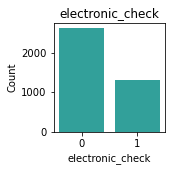

   electronic_check  Count  percentage
0                 0   2623       66.52
1                 1   1320       33.48


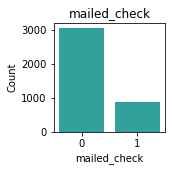

   mailed_check  Count  percentage
0             0   3051       77.38
1             1    892       22.62


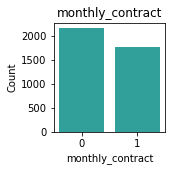

   monthly_contract  Count  percentage
1                 0   2162       54.83
0                 1   1781       45.17


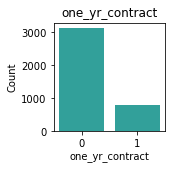

   one_yr_contract  Count  percentage
0                0   3136       79.53
1                1    807       20.47


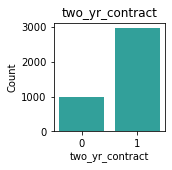

   two_yr_contract  Count  percentage
0                1   2969        75.3
1                0    974        24.7


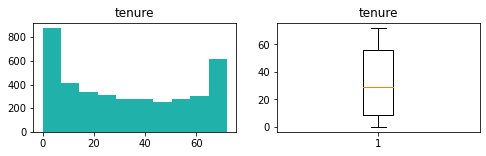

count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


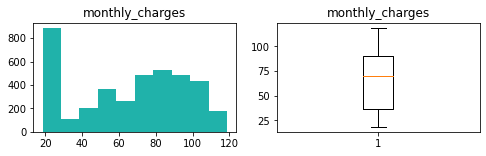

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


In [26]:
univariate_explorer(train,cat_variables, var_quant)

In [3]:
pip install -U imblearn

Note: you may need to restart the kernel to use updated packages.


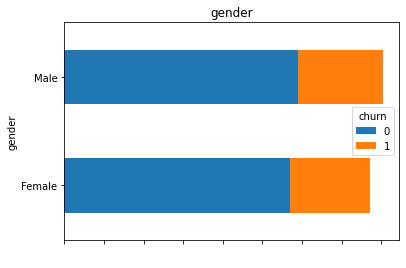

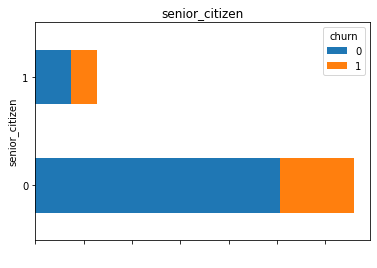

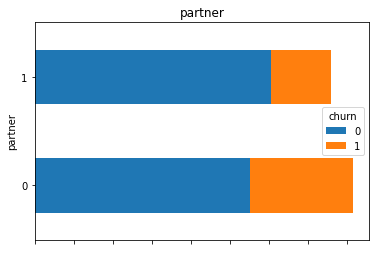

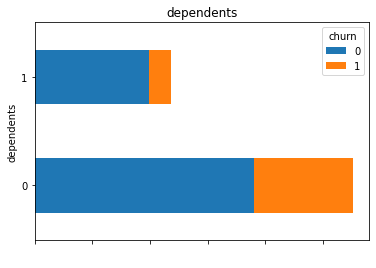

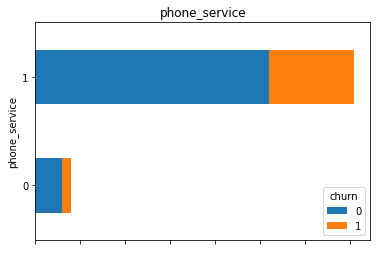

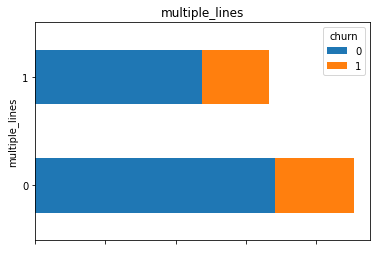

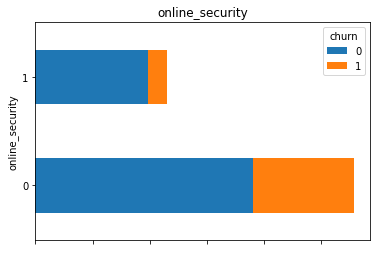

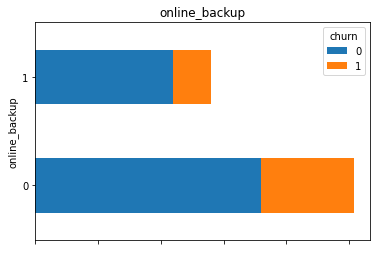

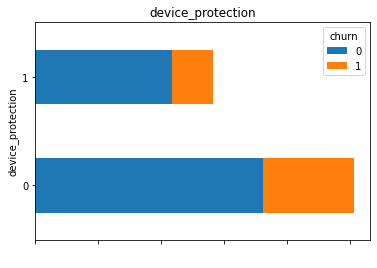

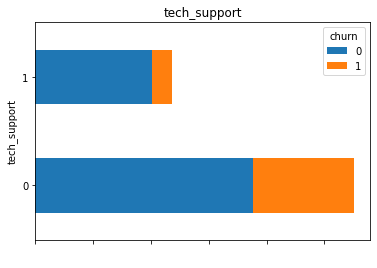

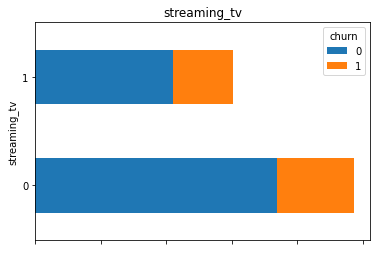

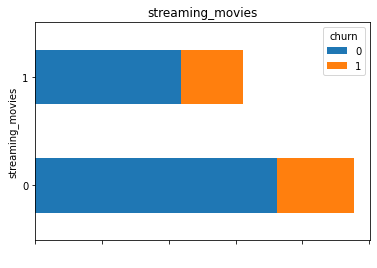

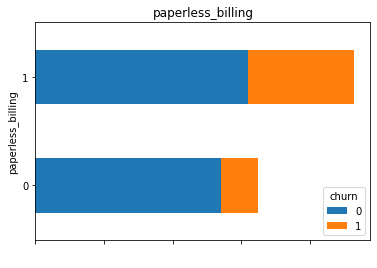

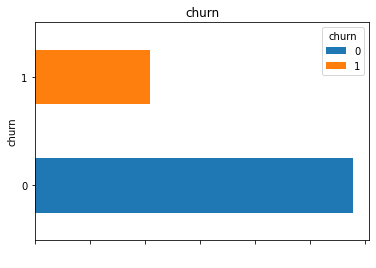

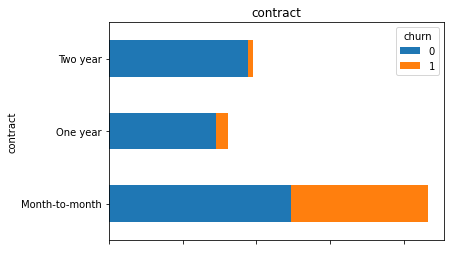

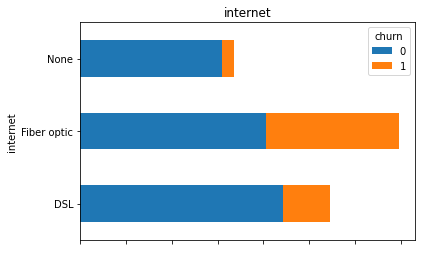

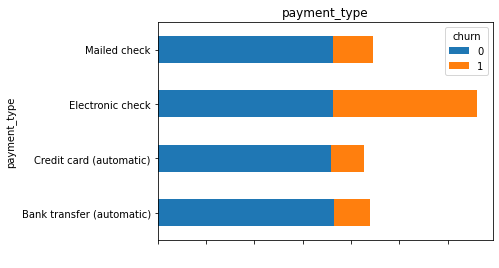

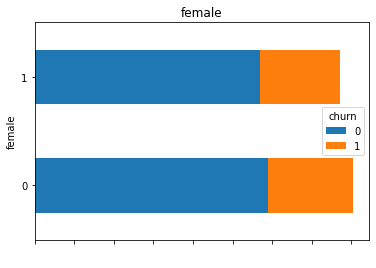

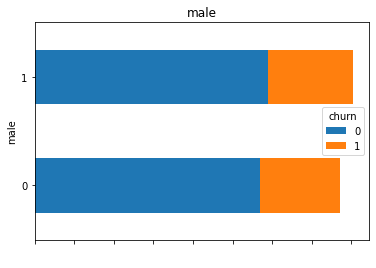

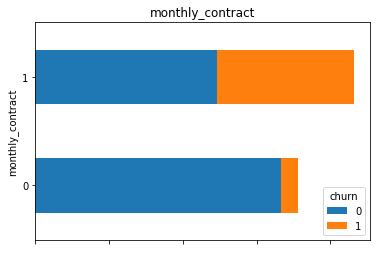

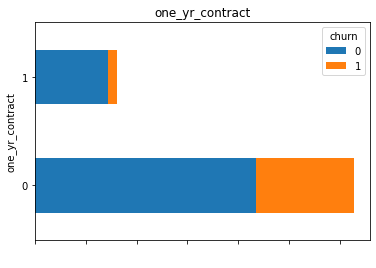

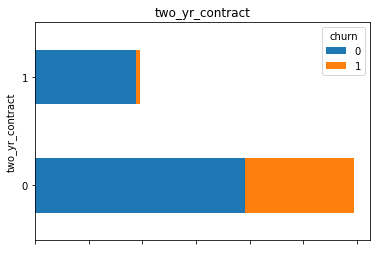

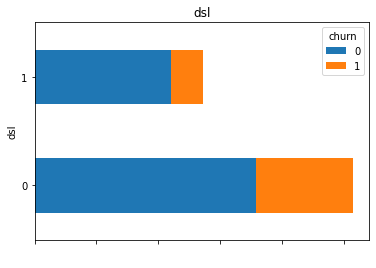

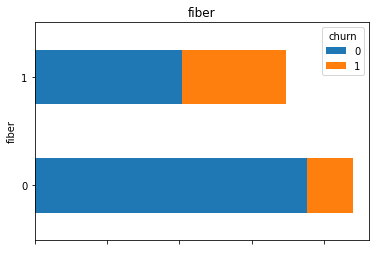

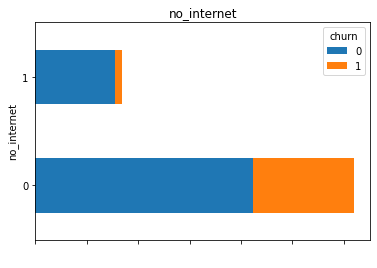

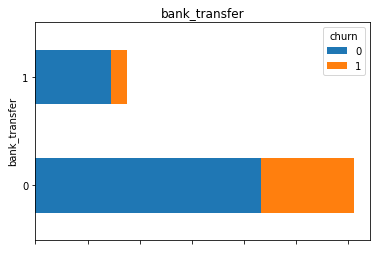

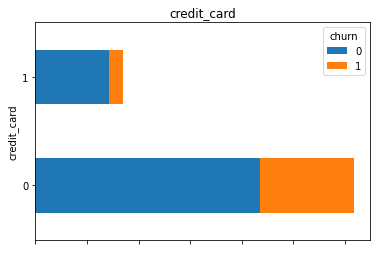

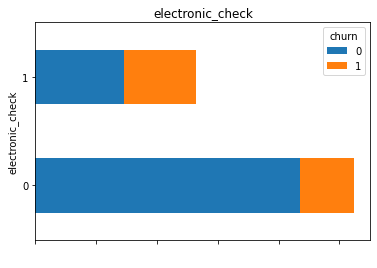

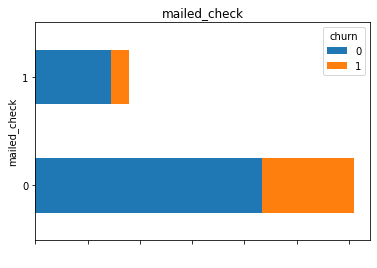

In [32]:
for i in variables:
    chart =pd.crosstab(data[i], data['churn']).plot(kind ='barh',stacked=True)
    chart.set(title=i)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.set(xlabel=' ')
    chart
    

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
features = train[['monthly_contract','fiber','online_security','online_backup','two_yr_contract']]

In [36]:
plt.figure(figsize=(80,10))
plot_tree(tree_clf, feature_names= x.columns, filled=True)
plt.show()

NameError: name 'tree_clf' is not defined

<Figure size 5760x720 with 0 Axes>

In [39]:
pipeline.fit(df_train, train[target])
pred = pipeline.predict(test)

NameError: name 'pipeline' is not defined

In [38]:

from sklearn.metrics import classification_report
print(classification_report(test['churn'], pred))

NameError: name 'pred' is not defined

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

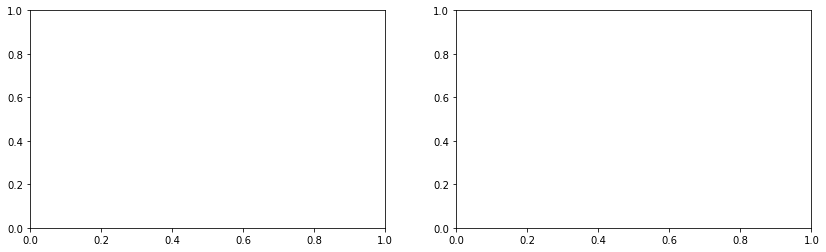

In [53]:
#feature = 'contract'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
train[train.churn == 0]['contract'].value_counts().plot('bar')#, ax=ax[0]).set_title('not churned')
train[train.churn == 1]['contract'].value_counts().plot('bar')#, ax=ax[1]).set_title('churned')

monthly_contract
1                   2162
0                   1781
dtype: int64

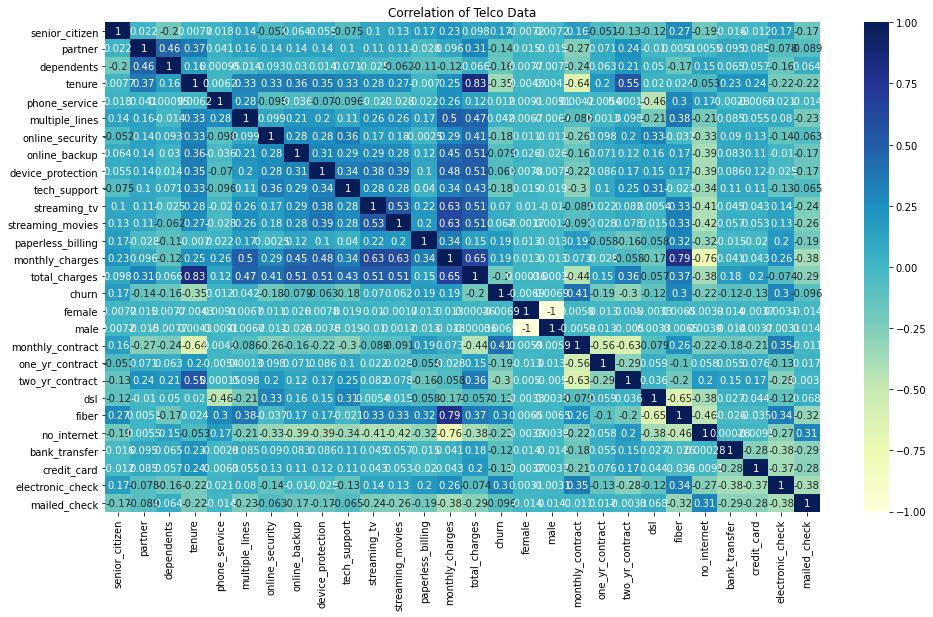

In [54]:
plt.figure(figsize=(16,9))

sns.heatmap(train.corr(), cmap='YlGnBu', center=0, annot=True)

plt.title('Correlation of Telco Data')

plt.show()

In [55]:
train.corr()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
senior_citizen,1.000000,0.021704,-0.201859,0.007666,0.017884,0.137272,-0.052215,0.063849,0.054971,-0.075292,...,0.157663,-0.051119,-0.134109,-0.120798,0.273674,-0.191692,-0.015985,-0.012184,0.173069,-0.167323
partner,0.021704,1.000000,0.463617,0.366470,0.041129,0.155811,0.144792,0.135489,0.140242,0.100511,...,-0.268490,0.070877,0.243511,-0.010031,0.005104,0.005469,0.094710,0.084683,-0.078225,-0.089288
dependents,-0.201859,0.463617,1.000000,0.160178,0.000945,-0.013628,0.093181,0.029841,0.013517,0.071267,...,-0.236495,0.062744,0.214199,0.049894,-0.167655,0.145469,0.065442,0.056857,-0.163981,0.063927
tenure,0.007666,0.366470,0.160178,1.000000,0.006187,0.325379,0.328232,0.364211,0.349927,0.328066,...,-0.637509,0.198606,0.549839,0.020264,0.023973,-0.052663,0.229637,0.241171,-0.215684,-0.222408
phone_service,0.017884,0.041129,0.000945,0.006187,1.000000,0.284602,-0.097775,-0.035837,-0.069898,-0.096026,...,0.004231,-0.005385,0.000155,-0.457254,0.295699,0.172852,-0.002827,-0.006338,0.020748,-0.014355
multiple_lines,0.137272,0.155811,-0.013628,0.325379,0.284602,1.000000,0.098892,0.211970,0.201066,0.106113,...,-0.086136,0.001305,0.098173,-0.214480,0.382392,-0.214702,0.084629,0.054905,0.079719,-0.228117
online_security,-0.052215,0.144792,0.093181,0.328232,-0.097775,0.098892,1.000000,0.280355,0.283492,0.357947,...,-0.255712,0.097993,0.203399,0.325233,-0.037138,-0.333149,0.089653,0.128454,-0.135596,-0.062605
online_backup,0.063849,0.135489,0.029841,0.364211,-0.035837,0.211970,0.280355,1.000000,0.310676,0.288971,...,-0.158345,0.070988,0.116309,0.158861,0.165721,-0.385889,0.083323,0.105632,-0.010495,-0.174963
device_protection,0.054971,0.140242,0.013517,0.349927,-0.069898,0.201066,0.283492,0.310676,1.000000,0.342797,...,-0.217549,0.086082,0.170505,0.154877,0.170772,-0.387386,0.086333,0.115143,-0.025448,-0.170447
tech_support,-0.075292,0.100511,0.071267,0.328066,-0.096026,0.106113,0.357947,0.288971,0.342797,1.000000,...,-0.295957,0.101034,0.246993,0.314140,-0.020598,-0.340323,0.106420,0.105076,-0.128227,-0.064599


In [56]:
# divide customers in to tenure group

raw_data['tenure'].max()

72

In [57]:
labels = ['{0} - {1}'.format(i, i+11) for i in range(1, 72,12)]

raw_data['tenure_group'] = pd.cut(raw_data.tenure, range(1,80,12), right=False, labels=labels)

In [58]:
raw_data.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64